# HA01-1
### Obtain data of fission cross sections for $^{235}$U and $^{238}$U as a function of energy and plot them. ###

To run this notebook you need to use a computer which has Jupyter installed. You can run it from all computers in the computer labs at Ångström. If you prefere to use our own computer the easiest way to install Jupyter is to use the [Anaconda](https://www.anaconda.com/distribution/) platform.

Cross sections can be readily obtained from repositories sources such as: [NNDC](https://www.nndc.bnl.gov/exfor/endf00.jsp) or [IAEA](https://www-nds.iaea.org/exfor/endf.htm). However, the perhaps most user friendly source is the Nuclear Data Center at the Korea Atomic Energy Research Institute [(KAERI)](http://atom.kaeri.re.kr/nuchart/).

An alternative is the application [JANIS](https://www.oecd-nea.org/janis/) from NEA that can either be run in the web browser or downloaded as a standalone tool.

Familiarize yourself with one or more of the the repositories by ploting and comparing the fission and capture cross sections of $^{235}$U and $^{238}$U. For example, at the KAERI page you can compare cross sections by plotting them in the same graph using the XSViewer. Add a gragh to the XSViewer by loading it and press the button *Add to XSViewer*. After you have added multiple graphs you can view them in the same plot by pressing *Open XSViewer*.

There are multiple sources of data available, such as ENDF/B (USA), JENDL (Japan), JEFF (European). You can compare the different sources but for the exercize you should use JEFF-3.2. 

**Extract the data from one of the sources and plot it in Python (or your own choice of data analysis software).**

You can extract the data from KAERI by pressing *Get Data*. Mark, copy and past the data into a text document and save it in the same folder as this Notebook. In this folder there is already data for $^{235}$U in files called *U235_xs_nf.txt* and *U235_xs_cap.txt*. Extract the data for $^{238}$U.

To import the data into Python and plot it we first need to import two libraries, *numpy* and *matplotlib*. Mark the cell below and execute it by pressing *Shift*+*Enter*.

In [1]:
import numpy as np # We can now use numpy functions calling np
import matplotlib.pyplot as plt # We can now use matplotlib functions calling plt
# plt.rcParams.update({'font.size': 11})

We can now load the data using the *numpy* function *loadtxt*. Below is an example for the $^{235}$U data.

In [2]:
U235_xs_nf = np.loadtxt('U235_xs_nf.csv', skiprows=3) # Use skiprows to skip header lines
U235_xs_cap = np.loadtxt('U235_xs_cap.csv', skiprows=3)

# Add rows to also load the U238 data.
U238_xs_nf = np.loadtxt('U238_xs_nf.csv', skiprows=3) #By students
U238_xs_cap = np.loadtxt('U238_xs_cap.csv', skiprows=3) #By students

The data is now in the form of two-dimensional arrays with 40860 Energies in the 0:th column and 40860 cross sections in the 1:st column.

In [3]:
U235_xs_nf.shape

(40860, 2)

**Add rows above to also load the $^{238}U$ data.**

We can address an individual colum (variable) using U235_xs_nf[:,i], where i is the column number (0 or 1). We plot it using the *pyplot* function *loglog*.

/Users/andreassolders/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


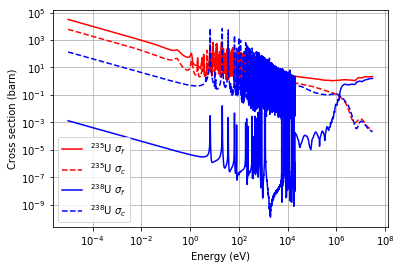

In [4]:
plt.loglog(U235_xs_nf[:,0],U235_xs_nf[:,1],'r-',label='$^{235}$U $\sigma_f$') # label set the label for the legend.

# Add rows here to plot the other cross sections in the same plot
plt.loglog(U235_xs_cap[:,0],U235_xs_cap[:,1],'r--',label='$^{235}$U $\sigma_c$') # By students
plt.loglog(U238_xs_nf[:,0],U238_xs_nf[:,1],'b-',label='$^{238}$U $\sigma_f$') # By students
plt.loglog(U238_xs_cap[:,0],U238_xs_cap[:,1],'b--',label='$^{238}$U $\sigma_c$') # By students

plt.grid() # Adds grid lines
plt.legend() # Shows the legend
plt.xlabel('Energy (eV)') # Titel for the x-axis
plt.ylabel('Cross section (barn)') # Titel for the y-axis
plt.show()

The function *loglog* is a version of the *pyplot* function *plot* which plots with both axis in logarithmic scale. You can find more information about *plot* here: [pyplot.plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot).

**Plot the other cross sections in the same diagram. Change line styles and colors so that the lines can be distinguished.**

Unfortunatly, the data files you have loaded have different number of energies and energy-steps. This means that if we want to do pointwize comparisons or calculations using the data we need to resample it to be evaluated at the same energies. This can be done by interpolation using the numpy function *interp*. First we create an array with the energies at which we would like to know the crossesctions.

In [5]:
# Create an array with 100.000 energypoints logarthimically spaced between 10^-5 and 10^7.
E = np.logspace(-5, 7, 100000) #100000
# Do the interpolation
U235_nf = np.interp(E,U235_xs_nf[:,0],U235_xs_nf[:,1])

# Add rows here for the other data sets
U235_cap = np.interp(E,U235_xs_cap[:,0],U235_xs_cap[:,1]) #By students
U238_nf = np.interp(E,U238_xs_nf[:,0],U238_xs_nf[:,1]) #By students
U238_cap = np.interp(E,U238_xs_cap[:,0],U238_xs_cap[:,1]) #By students

**Add rows above to also interpolate the other data at the same energies.**

Plot the interpolated data to make sure it looks the same as the original.

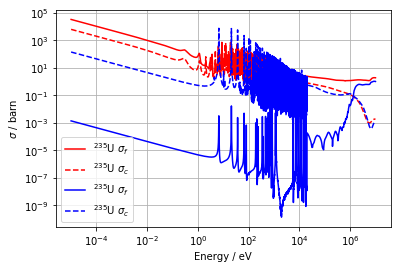

In [6]:
plt.loglog(E,U235_nf,'r-',label='$^{235}$U $\sigma_f$')

# Add rows here to plot the other cross sections in the same plot
plt.loglog(E,U235_cap,'r--',label='$^{235}$U $\sigma_c$') # By students
plt.loglog(E,U238_nf,'b-',label='$^{235}$U $\sigma_f$') # By students
plt.loglog(E,U238_cap,'b--',label='$^{235}$U $\sigma_c$') # By students

plt.grid()
plt.legend()
plt.xlabel('Energy / eV')
plt.ylabel('$\sigma$ / barn')
plt.show()

From the microscoptic cross sections we can calculate the macroscopic cross sections.

**Calculate and the mactroscopic cross sections for pure $^{238}U$ and $^{235}U$ as a function of neutron energy.**

In [7]:
#U235_NF = U235_nf * # continue this calculation

U235_NF = U235_nf * 1E-24 * 19.1 * 6.023E23 /235 # By students
U235_CAP = U235_cap * 1E-24 * 19.1 * 6.023E23 /235 # By students
U238_NF = U238_nf * 1E-24 * 19.1 * 6.023E23 /238 # By students
U238_CAP = U238_cap * 1E-24 * 19.1 * 6.023E23 /238 # By students

**Plot the macroscopic cross sections**

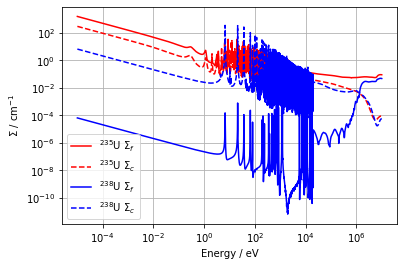

In [8]:
plt.loglog(E,U235_NF,'r-',label='$^{235}$U $\Sigma_f$')
# Add rows here
plt.loglog(E,U235_CAP,'r--',label='$^{235}$U $\Sigma_c$') # By students
plt.loglog(E,U238_NF,'b-',label='$^{238}$U $\Sigma_f$') # By students
plt.loglog(E,U238_CAP,'b--',label='$^{238}$U $\Sigma_c$') # By students

plt.grid()
plt.legend()
plt.xlabel('Energy / eV')
plt.ylabel('$\Sigma$ / cm$^{-1}$')
plt.show()

Whether or not a self-sustained chain reaction can be achieved is governed by the competition between neutron absoprtion and fission.

**Calculate (from the fission and capture cross sections) the macroscopic absorption cross sections for $^{235}$U and $^{238}$U and plot together with the fission cross sections.**

In [9]:
# U235_ABS = continue here...
U235_ABS = U235_NF + U235_CAP # By students
U238_ABS = U238_NF + U238_CAP # By students

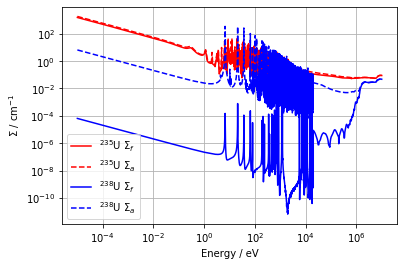

In [10]:
plt.loglog(E,U235_NF,'r-',label='$^{235}$U $\Sigma_f$')
# Add rows here

plt.loglog(E,U235_ABS,'r--',label='$^{235}$U $\Sigma_a$') # By students
plt.loglog(E,U238_NF,'b-',label='$^{238}$U $\Sigma_f$') # By students
plt.loglog(E,U238_ABS,'b--',label='$^{238}$U $\Sigma_a$') # By students

plt.grid()
plt.legend()
plt.xlabel('Energy / eV')
plt.ylabel('$\Sigma$ / cm$^{-1}$')
plt.show()

Natural uranium ($^{\mathrm{nat}}$U) consists of 0.7% $^{235}$U and the rest is $^{238}$U.\
**Plot the mactroscopic cross sections, fission and absorption, of $^{nat}U$ as a function of neutron energy.**

In [11]:
# Put your code here...

The reproduction factor, $\eta(E)$, is the average number of fission neutrons produced per neutron absorbed. This is an important parameter when determining a reactor's neutron economy. To calculate it we need to know the average neutron multiplicity, $\bar{\nu}$. However, the neutron multiplicity depends on the material and the energy of the incoming neutron. Data for this can be found in the data tables. To help you we provide below a code to read this data from a text file (JEFF3.3) and interpolate to the same eneries as the cross sections.

**Plot the neutron multiplicity for $^{235}$U and $^{238}$U as a function of energy**

In [12]:
nubar = np.loadtxt('U5_U8_nubar.csv', skiprows=3) # Use skiprows to skip header lines
U235_nubar = np.interp(E,nubar[:,0],nubar[:,1])
U238_nubar = np.interp(E,nubar[:,0],nubar[:,2])
# Plot nubar here...

**Calculate and plot the reproduction factor for natural uranium as well as for two different enrichments.**

In [13]:
# Put your code here...

--------------

## The following is not for student excersize. My demonstration.

In [14]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import FloatSlider

In [15]:
def f(e_procent):
    e=e_procent/100
    Umix_NF = e*U235_NF + (1-e)*U238_NF
    Umix_ABS = e*U235_ABS + (1-e)*U238_ABS
    #plt.rcParams.update({'font.size': 24})
    plt.figure(num=None, figsize=(8, 6), dpi=80)
    plt.loglog(E,Umix_NF,'r-',label='U(n,f)')
    plt.loglog(E,Umix_ABS,'b--',label='U(n,a)')
    #plt.loglog(E,Umix_NF/Umix_ABS,'b--',label='U(n,a)')
    # Add row here to plot U238 in the same plot
    plt.grid()
    plt.ylim([1e-9,1e4])
    plt.legend()
    plt.xlabel('Energy / eV')
    plt.ylabel('$\Sigma$ / cm$^{-1}$')
    plt.show()
    return e_procent


interact(f, e_procent=FloatSlider(min=0.000,max=100.000,step=0.01,continuous_update=False));

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='e_procent', step=0.01), Out…

In [16]:
def f(e_procent):
    e=e_procent/100
    Umix_NF = e*U235_NF + (1-e)*U238_NF
    Umix_ABS = e*U235_ABS + (1-e)*U238_ABS
    nubar = e*U235_nubar + (1-e)*U238_nubar
    eta = nubar*Umix_NF/Umix_ABS
    plt.rcParams.update({'font.size': 20})
    plt.figure(num=None, figsize=(8, 6), dpi=80)
    plt.semilogx(E,U235_nubar,'b-',label='$\overline{\\nu}_{U235}$')
    plt.semilogx(E,U238_nubar,'b--',label='$\overline{\\nu}_{U238}$')
    plt.semilogx(E,eta,'r-',label='$\eta$')
    
    plt.grid()
    plt.ylim([0,4])
    plt.legend()
    plt.xlabel('Energy / eV')
    plt.ylabel('')
    
    plt.show()
    return e_procent


interact(f, e_procent=FloatSlider(min=0.000,max=100.000,step=0.01,continuous_update=False));

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='e_procent', step=0.01), Out…

In [19]:
def f(e_procent):
    e=e_procent/100
    Umix_NF = e*U235_NF + (1-e)*U238_NF
    Umix_ABS = e*U235_ABS + (1-e)*U238_ABS
    

    plt.rcParams.update({'font.size': 20})
    plt.figure(num=None, figsize=(8, 6), dpi=80)
   
    plt.semilogx(E,Umix_NF/Umix_ABS,'r-',label='$\Sigma_f / \Sigma_a$')
    
    plt.grid()
    plt.ylim([0,1])
    plt.legend()
    plt.xlabel('Energy / eV')
    plt.ylabel('')
    
    plt.show()
    return e_procent


interact(f, e_procent=FloatSlider(min=0.000,max=100.000,step=0.01,continuous_update=False));

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='e_procent', step=0.01), Out…